In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=f2d2449e2ca860d7a41e6319300cb30d7d4a122acd2668ce6a56e0391a423e8f
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Customer_Segmentation").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.ml.clustering import KMeans
import pandas as pd
import seaborn as sns #importing data visualization libraries
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/OnlineRetail.csv",encoding= 'unicode_escape')

In [ ]:
data.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,4.15,12680,France,16.60


In [ ]:
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)

<ipython-input-7-d8624b34eb72>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.InvoiceDate = pd.to_datetime(data.InvoiceDate)


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID,Sales
count,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434,17.987795
std,218.081158,96.759853,1484.746041,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14367.000000,3.400000
50%,3.000000,2.080000,15287.000000,9.750000
75%,10.000000,4.130000,16255.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

In [ ]:
data.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Sales             0
dtype: int64

In [ ]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Sales             0
dtype: int64

Label Encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Country']= label_encoder.fit_transform(data['Country'])



In [ ]:
data = data.loc[data.groupby('CustomerID').InvoiceDate.idxmax()]


In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,36,77183.60
428957,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,2011-10-31,3.75,12347,17,45.00
359058,568172,23077,DOUGHNUT LIP GLOSS,120,2011-09-25,1.25,12348,12,150.00
485502,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21,7.50,12349,19,15.00
80323,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02,2.10,12350,25,25.20
...,...,...,...,...,...,...,...,...,...
111045,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-07-03,7.90,18280,36,23.70
222954,556464,22037,ROBOT BIRTHDAY CARD,12,2011-12-06,0.42,18281,36,5.04
295686,C562808,23187,FRENCH STYLE STORAGE JAR BONBONS,-5,2011-09-08,0.29,18282,36,-1.45
514067,579673,23294,SET OF 6 SNACK LOAF BAKING CASES,5,2011-11-30,0.83,18283,36,4.15


In [ ]:
data.set_index('CustomerID',inplace=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
CustomerID,,,,,,,,
12346,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,36,77183.60
12347,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,2011-10-31,3.75,17,45.00
12348,568172,23077,DOUGHNUT LIP GLOSS,120,2011-09-25,1.25,12,150.00
12349,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21,7.50,19,15.00
12350,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02,2.10,25,25.20
...,...,...,...,...,...,...,...,...
18280,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-07-03,7.90,36,23.70
18281,556464,22037,ROBOT BIRTHDAY CARD,12,2011-12-06,0.42,36,5.04
18282,C562808,23187,FRENCH STYLE STORAGE JAR BONBONS,-5,2011-09-08,0.29,36,-1.45


In [ ]:
#feat_cols = ['Quantity' , 'UnitPrice', 'Country', 'Sales']
feat_cols = [ 'Country', 'Sales']

In [ ]:
data = data[feat_cols]

In [ ]:
data[data < 0] = 0

<ipython-input-18-ab10b3d6c888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < 0] = 0
<ipython-input-18-ab10b3d6c888>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < 0] = 0


In [ ]:
data

,Country,Sales
CustomerID,,
12346,36,77183.60
12347,17,45.00
12348,12,150.00
12349,19,15.00
12350,25,25.20
...,...,...
18280,36,23.70
18281,36,5.04
18282,36,0.00


In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
vector_assembler =  VectorAssembler(inputCols=feat_cols, outputCol= 'features')


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)



/usr/local/lib/python3.9/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
data.reset_index(drop=False,inplace=True)
data = sqlContext.createDataFrame(data)

In [ ]:
data.show()

+----------+-------+-------+
|CustomerID|Country|  Sales|
+----------+-------+-------+
|     12346|     36|77183.6|
|     12347|     17|   45.0|
|     12348|     12|  150.0|
|     12349|     19|   15.0|
|     12350|     25|   25.2|
|     12352|     25|    9.9|
|     12353|      2|   19.9|
|     12354|     31|   20.8|
|     12355|      2|   30.0|
|     12356|     27|   25.5|
|     12357|     33|   19.8|
|     12358|      1|   15.0|
|     12359|      7|   10.0|
|     12360|      1|   15.3|
|     12361|      3|   23.4|
|     12362|      3|    0.0|
|     12363|     37|   15.9|
|     12364|      3|   10.2|
|     12365|      7|   15.0|
|     12367|      9|   10.2|
+----------+-------+-------+
only showing top 20 rows



In [ ]:
final_data = vector_assembler.transform(data)
final_data.show()

+----------+-------+-------+--------------+
|CustomerID|Country|  Sales|      features|
+----------+-------+-------+--------------+
|     12346|     36|77183.6|[36.0,77183.6]|
|     12347|     17|   45.0|   [17.0,45.0]|
|     12348|     12|  150.0|  [12.0,150.0]|
|     12349|     19|   15.0|   [19.0,15.0]|
|     12350|     25|   25.2|   [25.0,25.2]|
|     12352|     25|    9.9|    [25.0,9.9]|
|     12353|      2|   19.9|    [2.0,19.9]|
|     12354|     31|   20.8|   [31.0,20.8]|
|     12355|      2|   30.0|    [2.0,30.0]|
|     12356|     27|   25.5|   [27.0,25.5]|
|     12357|     33|   19.8|   [33.0,19.8]|
|     12358|      1|   15.0|    [1.0,15.0]|
|     12359|      7|   10.0|    [7.0,10.0]|
|     12360|      1|   15.3|    [1.0,15.3]|
|     12361|      3|   23.4|    [3.0,23.4]|
|     12362|      3|    0.0|     [3.0,0.0]|
|     12363|     37|   15.9|   [37.0,15.9]|
|     12364|      3|   10.2|    [3.0,10.2]|
|     12365|      7|   15.0|    [7.0,15.0]|
|     12367|      9|   10.2|    

In [ ]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler

In [ ]:
#scaler = StandardScaler(inputCol="features",outputCol="ScaledFeatures",withStd=True,withMean=False)
scaler = MinMaxScaler(inputCol="features",outputCol="ScaledFeatures")

In [ ]:
scalerModel = scaler.fit(final_data)


In [ ]:
cluster_final_data = scalerModel.transform(final_data)

cluster_final_data.show()

+----------+-------+-------+--------------+--------------------+
|CustomerID|Country|  Sales|      features|      ScaledFeatures|
+----------+-------+-------+--------------+--------------------+
|     12346|     36|77183.6|[36.0,77183.6]|[0.97297297297297...|
|     12347|     17|   45.0|   [17.0,45.0]|[0.45945945945945...|
|     12348|     12|  150.0|  [12.0,150.0]|[0.32432432432432...|
|     12349|     19|   15.0|   [19.0,15.0]|[0.51351351351351...|
|     12350|     25|   25.2|   [25.0,25.2]|[0.67567567567567...|
|     12352|     25|    9.9|    [25.0,9.9]|[0.67567567567567...|
|     12353|      2|   19.9|    [2.0,19.9]|[0.05405405405405...|
|     12354|     31|   20.8|   [31.0,20.8]|[0.83783783783783...|
|     12355|      2|   30.0|    [2.0,30.0]|[0.05405405405405...|
|     12356|     27|   25.5|   [27.0,25.5]|[0.72972972972972...|
|     12357|     33|   19.8|   [33.0,19.8]|[0.89189189189189...|
|     12358|      1|   15.0|    [1.0,15.0]|[0.02702702702702...|
|     12359|      7|   10

In [ ]:
import numpy as np


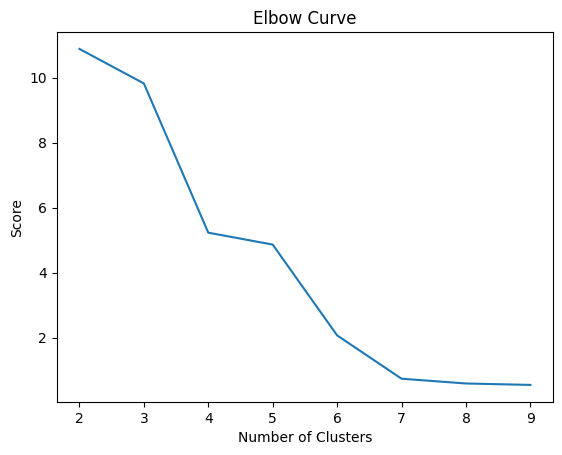

In [ ]:
cost = np.zeros(10)

for k in range(2,10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('ScaledFeatures')
    model = kmeans.fit(cluster_final_data)
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8, 9]
df_cost.insert(0, 'cluster', new_col)

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
# Using Standard Scalar we got k=4 as we took it as normal distribution data where as using Minmax scalr we got k=4

In [ ]:
kmeans4 = KMeans(featuresCol='ScaledFeatures',k=3)

In [ ]:
#kmeans4 = KMeans(featuresCol='ScaledFeatures',k=5)

In [ ]:
model_k4 = kmeans4.fit(cluster_final_data)

In [ ]:
model_k4.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   72|
|         2|  253|
|         0| 4047|
+----------+-----+



In [ ]:
prediction = model_k4.transform(cluster_final_data)


In [ ]:
prediction.show()

+----------+-------+-------+--------------+--------------------+----------+
|CustomerID|Country|  Sales|      features|      ScaledFeatures|prediction|
+----------+-------+-------+--------------+--------------------+----------+
|     12346|     36|77183.6|[36.0,77183.6]|[0.97297297297297...|         0|
|     12347|     17|   45.0|   [17.0,45.0]|[0.45945945945945...|         2|
|     12348|     12|  150.0|  [12.0,150.0]|[0.32432432432432...|         2|
|     12349|     19|   15.0|   [19.0,15.0]|[0.51351351351351...|         2|
|     12350|     25|   25.2|   [25.0,25.2]|[0.67567567567567...|         2|
|     12352|     25|    9.9|    [25.0,9.9]|[0.67567567567567...|         2|
|     12353|      2|   19.9|    [2.0,19.9]|[0.05405405405405...|         1|
|     12354|     31|   20.8|   [31.0,20.8]|[0.83783783783783...|         0|
|     12355|      2|   30.0|    [2.0,30.0]|[0.05405405405405...|         1|
|     12356|     27|   25.5|   [27.0,25.5]|[0.72972972972972...|         0|
|     12357|

In [ ]:
prediction = prediction.toPandas()

In [ ]:
prediction_acc = prediction

In [ ]:
#prediction_plot = prediction[['CustomerID','Quantity', 'UnitPrice',	'Country',	'Sales' ,'prediction']]
prediction_plot = prediction[['CustomerID','Country',	'Sales' ,'prediction']]
prediction = prediction[feat_cols]


In [ ]:
prediction

,Country,Sales
0,36,77183.60
1,17,45.00
2,12,150.00
3,19,15.00
4,25,25.20
...,...,...
4367,36,23.70
4368,36,5.04
4369,36,0.00
4370,36,4.15


In [ ]:
prediction_plot

,CustomerID,Country,Sales,prediction
0,12346,36,77183.60,0
1,12347,17,45.00,2
2,12348,12,150.00,2
3,12349,19,15.00,2
4,12350,25,25.20,2
...,...,...,...,...
4367,18280,36,23.70,0
4368,18281,36,5.04,0
4369,18282,36,0.00,0
4370,18283,36,4.15,0


In [ ]:
centroids=model_k4.clusterCenters()
centroids

[array([9.69613795e-01, 5.80731269e-04]),
 array([0.10923423, 0.00027678]),
 array([4.05405405e-01, 3.11471965e-04])]

In [ ]:
centroids = np.array(centroids).reshape(-1, 2)

In [ ]:
centroids

array([[9.69613795e-01, 5.80731269e-04],
       [1.09234234e-01, 2.76779246e-04],
       [4.05405405e-01, 3.11471965e-04]])

In [ ]:
accuracy_array= np.zeros(shape=(4372, 2))

In [ ]:
for i in range(4372):
  accuracy_array[i] = np.asarray(prediction_acc['ScaledFeatures'][i].values)

In [ ]:
accuracy_array

array([[9.72972973e-01, 4.58145565e-01],
       [4.59459459e-01, 2.67110505e-04],
       [3.24324324e-01, 8.90368351e-04],
       ...,
       [9.72972973e-01, 0.00000000e+00],
       [9.72972973e-01, 2.46335244e-05],
       [9.72972973e-01, 1.49581883e-04]])

In [ ]:
#df = pd.DataFrame(prediction_acc['ScaledFeatures'].values, columns = ['scf0'])

In [ ]:
#df['scf0'].values.mean().mean()

In [ ]:
from scipy.spatial.distance import cdist
D = cdist(accuracy_array, centroids, 'euclidean')
sum(np.min(D, axis=1))

50.77948236815304

In [ ]:
from scipy.spatial import distance_matrix
dist_mat = pd.DataFrame(distance_matrix(accuracy_array, centroids))
dist_mat

,0,1,2
0,0.457577,0.977593,0.729208
1,0.510154,0.350225,0.054054
2,0.645290,0.215091,0.081083
3,0.456101,0.404279,0.108108
4,0.293938,0.566441,0.270270
...,...,...,...
4367,0.003388,0.863739,0.567568
4368,0.003404,0.863739,0.567568
4369,0.003409,0.863739,0.567568
4370,0.003405,0.863739,0.567568


In [ ]:
dist_mat.drop(index=0)

,0,1,2
1,0.510154,0.350225,0.054054
2,0.645290,0.215091,0.081083
3,0.456101,0.404279,0.108108
4,0.293938,0.566441,0.270270
5,0.293939,0.566441,0.270270
...,...,...,...
4367,0.003388,0.863739,0.567568
4368,0.003404,0.863739,0.567568
4369,0.003409,0.863739,0.567568
4370,0.003405,0.863739,0.567568


In [ ]:
var = 0
for i in range(3):
  var += dist_mat[i].nlargest(10).mean()

**Variance**

In [ ]:
var/3

0.851531069649233

In [ ]:
scaler = MinMaxScaler()

In [ ]:
'''
scaler.fit(dist_mat)
dist_mat = scaler.transform(dist_mat)
dist_mat= pd.DataFrame(dist_mat, columns = [0,1,2])
dist_mat.index= dist_mat.index
dist_mat
'''

'\nscaler.fit(dist_mat)\ndist_mat = scaler.transform(dist_mat)\ndist_mat= pd.DataFrame(dist_mat, columns = [0,1,2])\ndist_mat.index= dist_mat.index\ndist_mat\n'

In [ ]:
dist_mat[0].mean()

0.05334143078248901

In [ ]:
dist_mat[1].mean()

0.8147775098689378

In [ ]:
dist_mat[2].mean()

0.5313219824696812

In [ ]:
#dist_mat[3].mean()

<ipython-input-63-f47feac56cf7>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter( prediction.Country, prediction.Sales , cmap='brg', alpha=0.5)  # plot points with cluster dependent colors


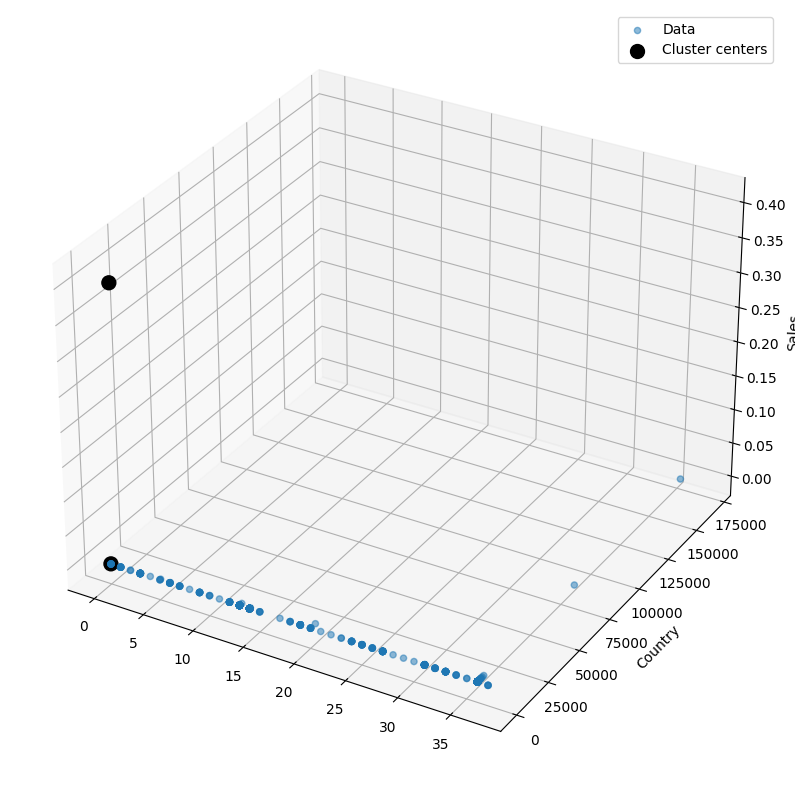

In [ ]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter( prediction.Country, prediction.Sales , cmap='brg', alpha=0.5)  # plot points with cluster dependent colors
ax.scatter(centroids[:][0],centroids[:][1],centroids[:][2], c = 'black', s=100, alpha=1)
plt.legend(['Data','Cluster centers'])


ax.set_ylabel('Country')
ax.set_zlabel('Sales')
plt.show()

In [ ]:
prediction_plot

,CustomerID,Country,Sales,prediction
0,12346,36,77183.60,0
1,12347,17,45.00,2
2,12348,12,150.00,2
3,12349,19,15.00,2
4,12350,25,25.20,2
...,...,...,...,...
4367,18280,36,23.70,0
4368,18281,36,5.04,0
4369,18282,36,0.00,0
4370,18283,36,4.15,0


In [ ]:
temp = prediction_plot

In [ ]:
temp

,CustomerID,Country,Sales,prediction
0,12346,36,77183.60,0
1,12347,17,45.00,2
2,12348,12,150.00,2
3,12349,19,15.00,2
4,12350,25,25.20,2
...,...,...,...,...
4367,18280,36,23.70,0
4368,18281,36,5.04,0
4369,18282,36,0.00,0
4370,18283,36,4.15,0


In [ ]:
temp.set_index('CustomerID',inplace=True)

In [ ]:
temp

,Country,Sales,prediction
CustomerID,,,
12346,36,77183.60,0
12347,17,45.00,2
12348,12,150.00,2
12349,19,15.00,2
12350,25,25.20,2
...,...,...,...
18280,36,23.70,0
18281,36,5.04,0
18282,36,0.00,0


In [ ]:
c0 = prediction_plot[prediction_plot.prediction == 0]
c1 = prediction_plot[prediction_plot.prediction == 1]
c2 = prediction_plot[prediction_plot.prediction == 2]
c3 = prediction_plot[prediction_plot.prediction == 3]


In [ ]:
plt.scatter(c0.Quantity,c0.Sales,color="blue")
plt.scatter(c1.Quantity,c1.Sales,color="green")
plt.scatter(c2.Quantity,c2.Sales,color="yellow")
plt.scatter(c3.Quantity,c3.Sales,color="red")
plt.show()

AttributeError: ignored

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(prediction_plot, prediction_plot.prediction, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.350


In [ ]:
prediction.columns

Index(['Country', 'Sales'], dtype='object')

In [ ]:
from sklearn.cluster import KMeans

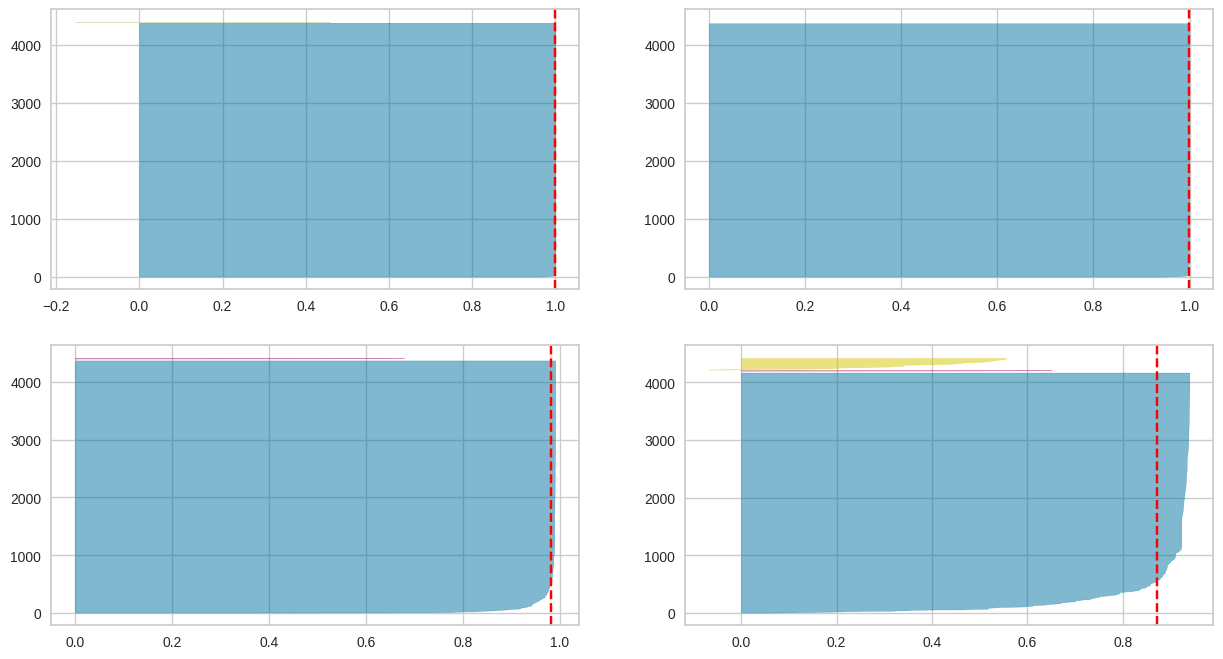

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(prediction_plot)